In [1]:
# Swapnil Saha Shawon (2022533042)
# Tamanna Rahman (2021450642)
# Syeda Mashiat Tabassum (2031356642)

In [2]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class KMeans:
    def __init__(self, n_clusters=8, init='k-means++', n_init="auto", max_iter=300, tol=0.00001, random_state=None):
        self.n_clusters = n_clusters
        self.init = init
        self.n_init = 10 if n_init == 'auto' else n_init
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state

    def fit(self, X):
        best_inertia = float('inf')
        best_centroids, best_labels = None, None
        self.n_features_in_ = X.shape[1]
        if self.random_state is not None:
            np.random.seed(self.random_state)

        for _ in range(self.n_init):
            self.centroids = self._init_centroids(X)
            for i in range(self.max_iter):
                labels = self._assign_clusters(X)
                new_centroids = self._update_centroids(X, labels)
                if np.allclose(self.centroids, new_centroids, atol=self.tol):
                    break
                self.centroids = new_centroids

            inertia = self._calculate_inertia(X, labels)
            if inertia < best_inertia:
                best_inertia, best_centroids, best_labels = inertia, self.centroids, labels

        self.cluster_centers_, self.labels_ = best_centroids, best_labels
        self.n_iter_ = i + 1
        return self

    def _init_centroids(self, X):
        if self.init == 'k-means++':
            centroids = [X[np.random.choice(X.shape[0])]]
            for _ in range(1, self.n_clusters):
                dist_sq = np.min(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)**2, axis=1)
                probs = dist_sq / dist_sq.sum()
                centroids.append(X[np.random.choice(X.shape[0], p=probs)])
            return np.array(centroids)
        else:
            return X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        return np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])

    def _calculate_inertia(self, X, labels):
        return sum(np.linalg.norm(X[labels == i] - self.centroids[i])**2 for i in range(self.n_clusters))




First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is: (300, 2)
cluster_center (3, 2)
labels (300,)


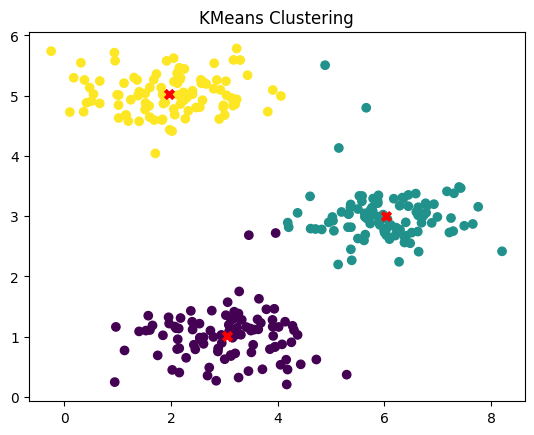

In [4]:
# Load the dataset
X = np.load("/content/kmeans2d.npy")
print("First five elements of X are:\n", X[:5])
print('The shape of X is:', X.shape)

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=3,random_state=0, n_init="auto").fit(X)
print('cluster_center', kmeans.cluster_centers_.shape)
print('labels', kmeans.labels_.shape)

# Plot the clusters and their centroids
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
# Plot the centroids as red 'x's
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', c='r', linewidths=3)
plt.title('KMeans Clustering')
plt.show()

Shape of original_img is: (128, 128, 3)
Shape of X_img is: (16384, 3)
Cluster centers shape: (11, 3)
Labels shape: (16384,)


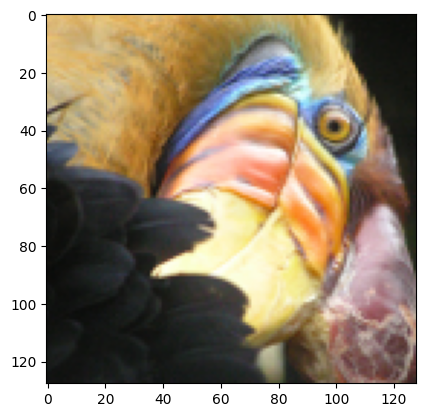

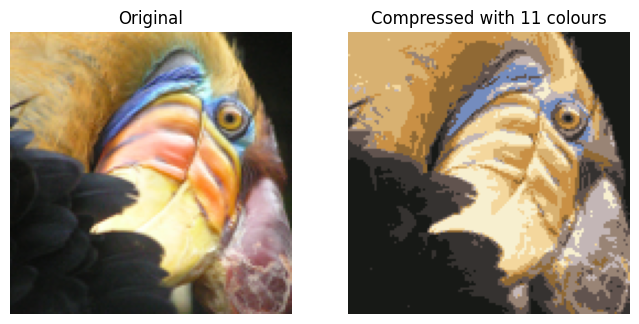

In [8]:
# Load an image of a bird
original_img = plt.imread('/content/bird_small.png')
plt.imshow(original_img)
print("Shape of original_img is:", original_img.shape)

# Normalize the image to be in the range 0 - 1
original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))
print("Shape of X_img is:", X_img.shape)
K = 11  #9, 10, 11,  Set the number of colors to compress the image to
kmeans = KMeans(n_clusters=K, n_init='auto', random_state=0).fit(X_img)
print('Cluster centers shape:', kmeans.cluster_centers_.shape)
print('Labels shape:', kmeans.labels_.shape)

# Recover the compressed image
X_recovered = kmeans.cluster_centers_[kmeans.labels_,:]
X_recovered = np.reshape(X_recovered, original_img.shape)

# Display original image
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()